In [179]:
pip install ucimlrepo

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# fetch dataset
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597)

# data (as pandas dataframes)
X = productivity_prediction_of_garment_employees.data.features
y = productivity_prediction_of_garment_employees.data.targets
X['actual_productivity'] = y
# metadata
print(productivity_prediction_of_garment_employees.metadata)

# variable information
print(productivity_prediction_of_garment_employees.variables)


{'uci_id': 597, 'name': 'Productivity Prediction of Garment Employees', 'repository_url': 'https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees', 'data_url': 'https://archive.ics.uci.edu/static/public/597/data.csv', 'abstract': 'This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 1197, 'num_features': 14, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['actual_productivity'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51S6D', 'creators': [], 'intro_paper': {'ID': 399, 'type': 'NATIVE', 'title': 'Mining the productivity dat

In [181]:
X[X['wip'].isnull()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


<Axes: title={'center': ' Productivity Over Time'}, xlabel='Date', ylabel='Productivity'>

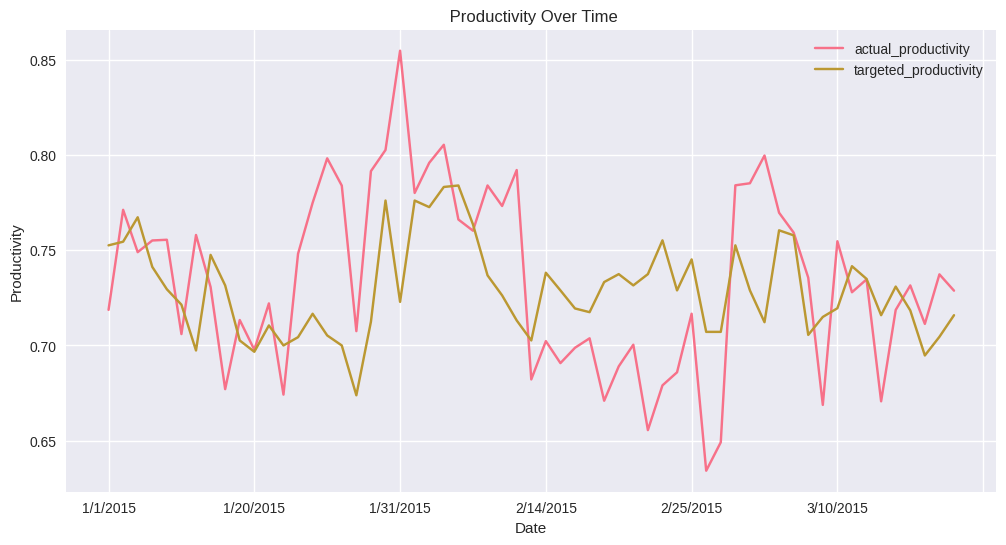

In [182]:
X.groupby(['date']).agg({'actual_productivity': 'mean','targeted_productivity': 'mean'}).plot(
    title=' Productivity Over Time',
    xlabel='Date',
    ylabel='Productivity',
    figsize=(12, 6))

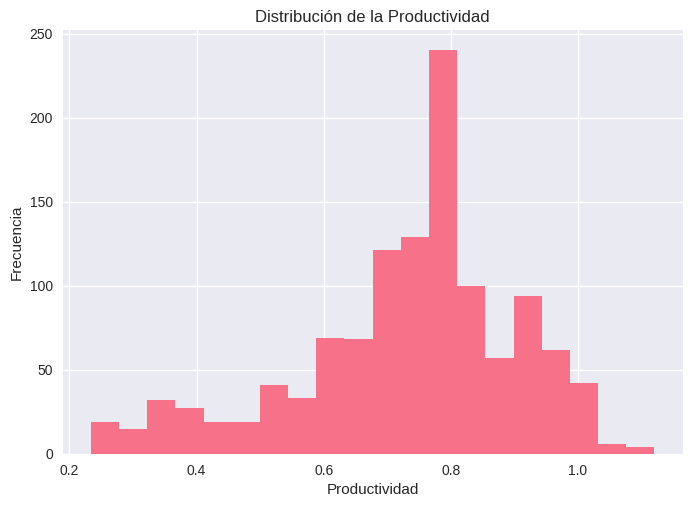

In [183]:
# 1. Distribución de 'actual_productivity' (para definir clases)
plt.hist(y['actual_productivity'], bins=20)
plt.xlabel('Productividad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Productividad')
plt.show()

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def plot_all_columns(df):
    # Get the number of columns
    n_cols = len(df.columns)

    # Calculate number of rows needed for subplot grid
    n_rows = (n_cols + 2) // 3  # 3 plots per row

    # Create a figure with subplots
    fig = plt.figure(figsize=(15, 5*n_rows))

    for idx, col in enumerate(df.columns, 1):
        plt.subplot(n_rows, 3, idx)

        # For numeric columns
        if pd.api.types.is_numeric_dtype(df[col]):
            # Histogram for numeric data
            sns.histplot(data=df, x=col, kde=True)
            plt.title(f'Distribution of {col}')

        # For categorical columns
        else:
            # Bar plot for categorical data
            value_counts = df[col].value_counts()
            sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.xticks(rotation=45)
            plt.title(f'Count of {col}')

    plt.tight_layout()
    plt.show()

# Create additional visualizations for relationships
def plot_correlations(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Create correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

# Create additional visualizations for relationships
def plot_correlations(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Create correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

# For specific column types:
def plot_column_details(df, column_name):
    plt.figure(figsize=(10, 6))

    if pd.api.types.is_numeric_dtype(df[column_name]):
        # Box plot for numeric data
        sns.boxplot(x=df[column_name])
        plt.title(f'Box Plot of {column_name}')
    else:
        # Pie chart for categorical data
        plt.pie(df[column_name].value_counts(),
                labels=df[column_name].value_counts().index,
                autopct='%1.1f%%')
        plt.title(f'Distribution of {column_name}')

    plt.show()

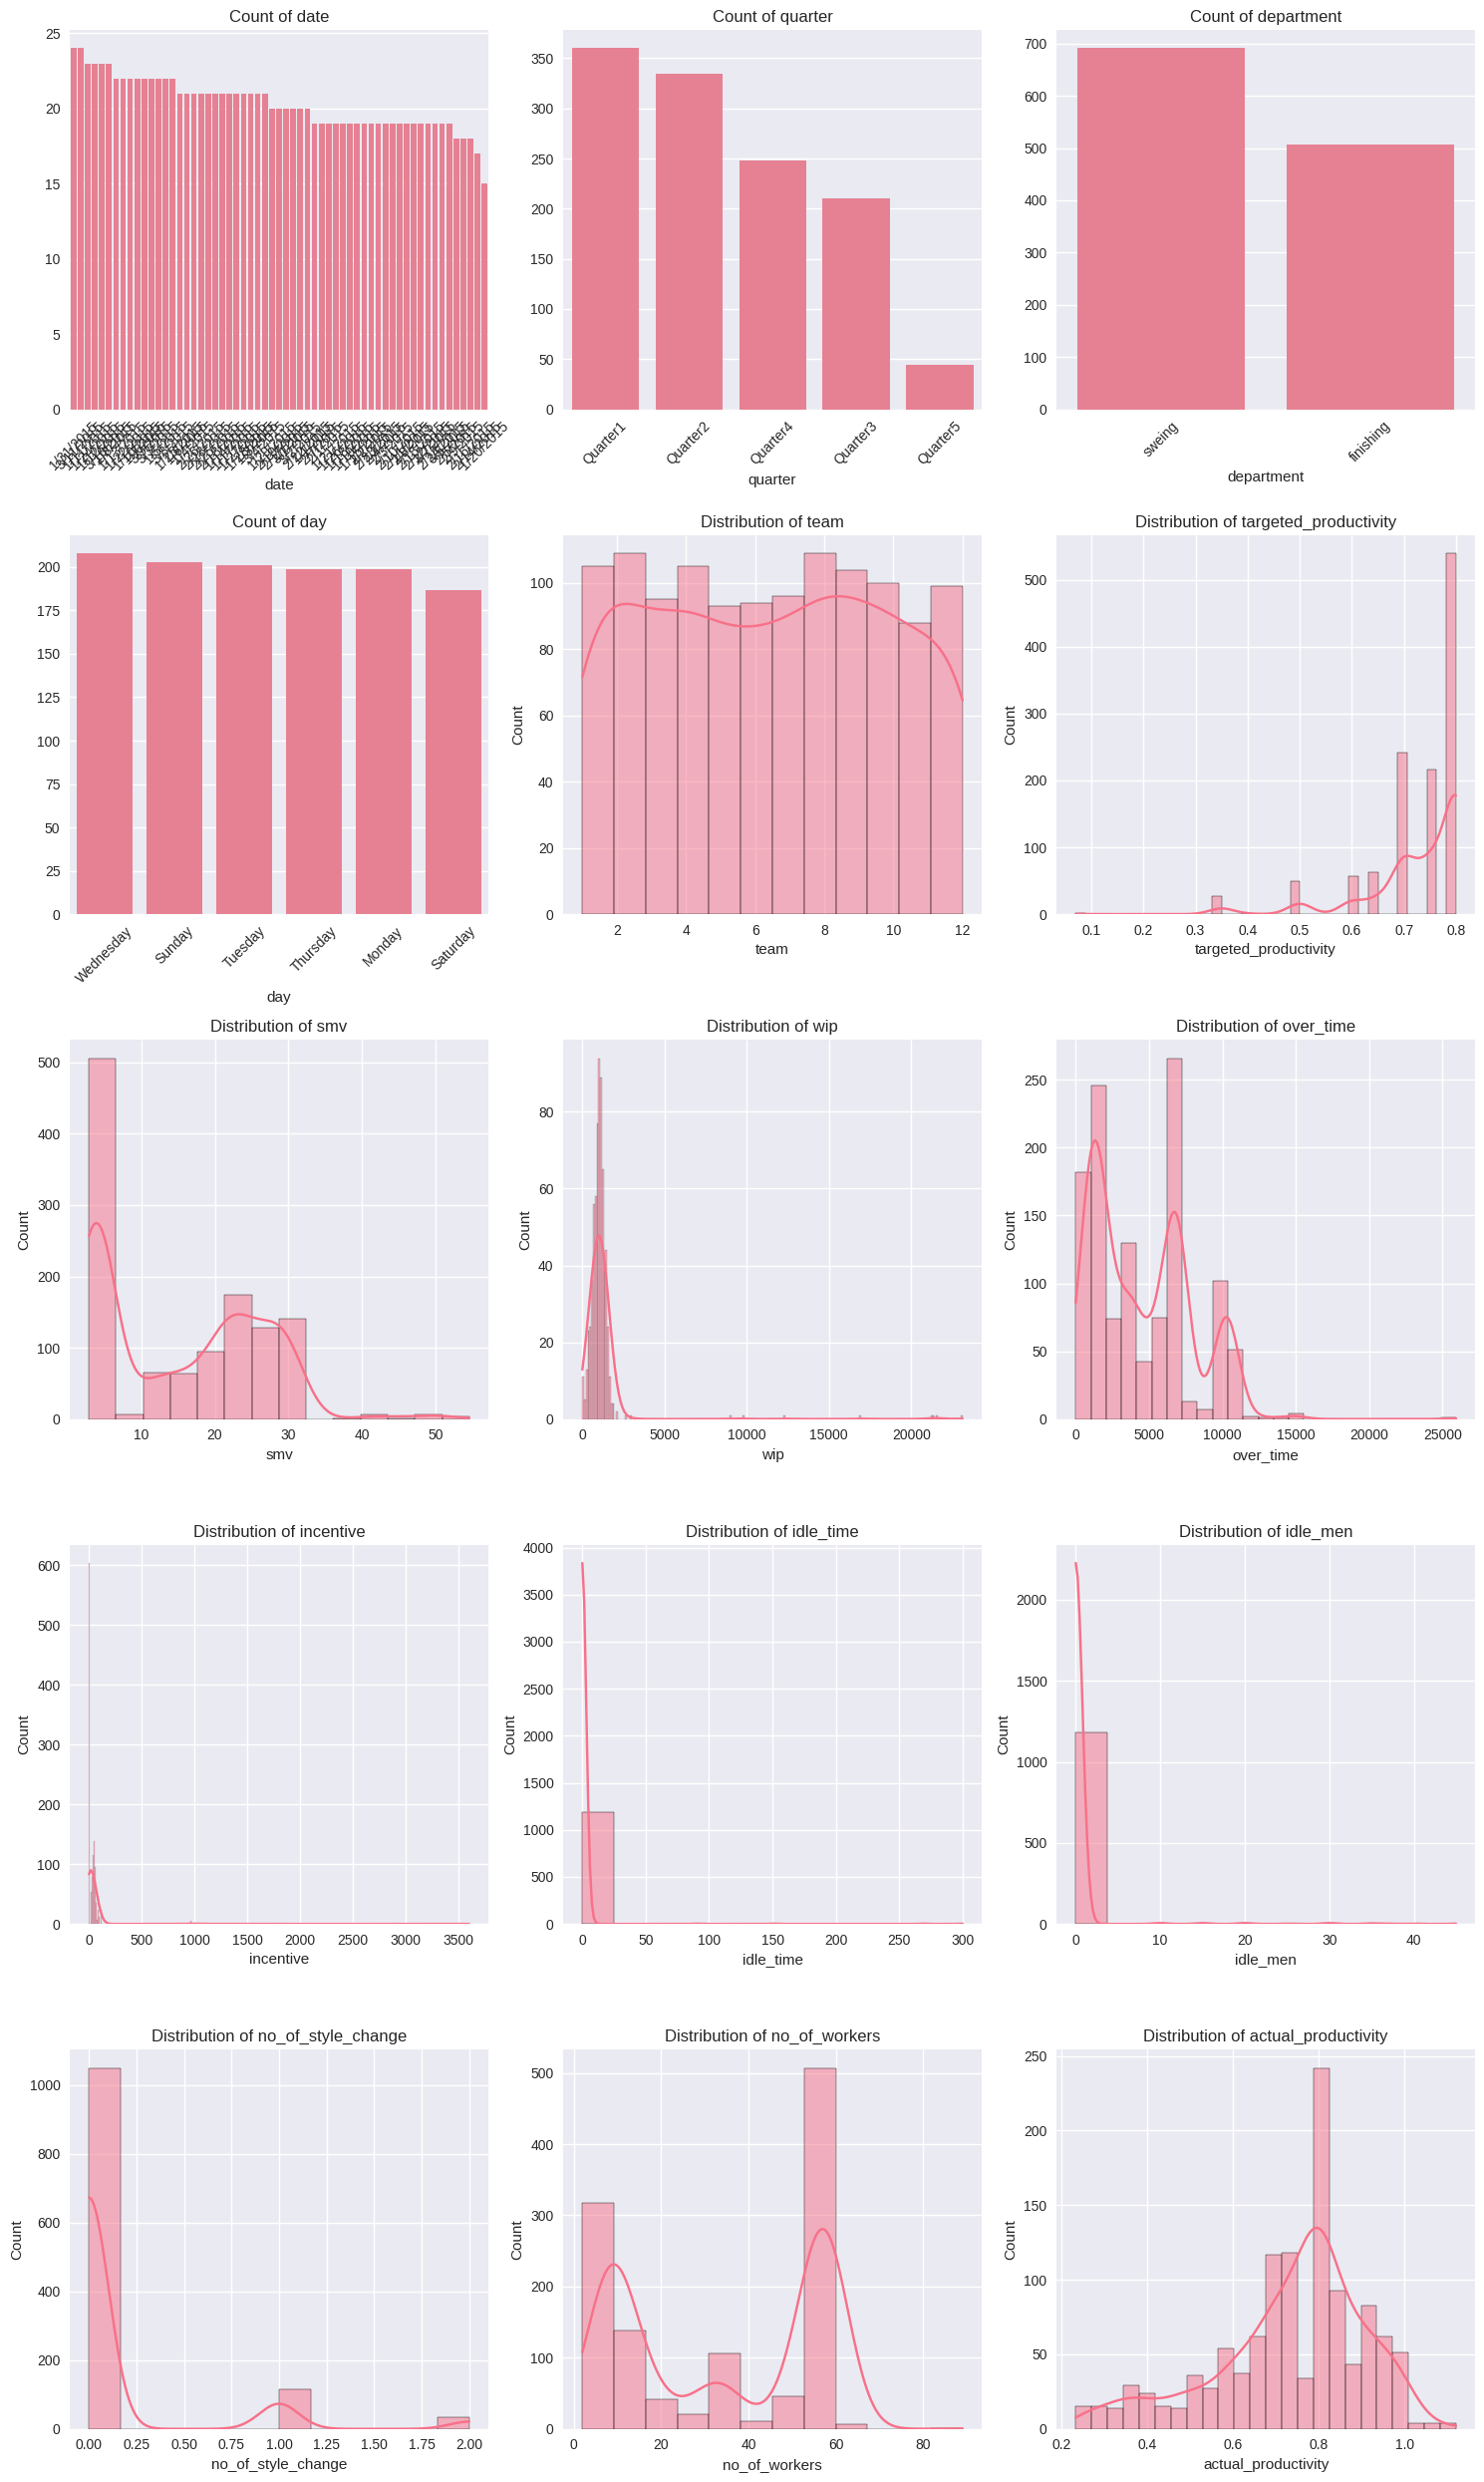

In [185]:
plot_all_columns(X)

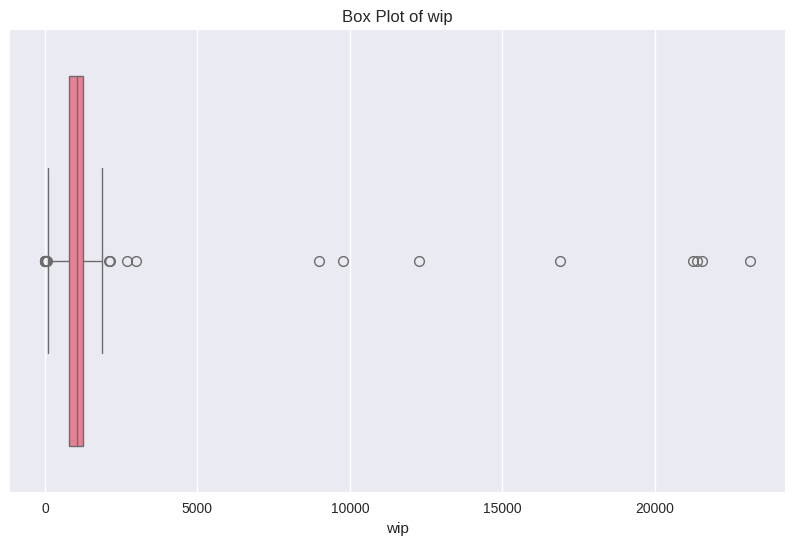

In [186]:
plot_column_details(X, 'wip')

In [187]:
# Drop outliers based on 'wip' column
#X['wip'].fillna(0, inplace=True)  # Fill NaN values with mean
#X = X[X['wip']<5000]

In [188]:
#X['have_idle_men'] = X['idle_men']>0
#X['have_incentive'] = X['incentive']>0
# Drop columns
# At least 98% is 0
#X.drop(columns=['idle_men'], inplace=True)

In [189]:
# 2. Valores faltantes en 'wip'
print("Valores faltantes en 'wip':", X['wip'].isnull().sum())

Valores faltantes en 'wip': 506


In [190]:
# 3. Cardinalidad de variables categóricas
print("\nCategorías únicas:")
print("Departamento:", X['department'].unique())
print("Día de la semana:", X['day'].unique())
print("Trimestre:", X['quarter'].unique())
print("Equipos:", X['team'].nunique())


Categorías únicas:
Departamento: ['sweing' 'finishing']
Día de la semana: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
Trimestre: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
Equipos: 12


In [191]:
# 4. Rango de fechas
print("\nRango de fechas:")
print("Mínima:", X['date'].min())
print("Máxima:", X['date'].max())


Rango de fechas:
Mínima: 1/1/2015
Máxima: 3/9/2015


In [192]:
# 5. vemos que la variable wip lleva valores NaN y definimos dos funciones para procesarlo

def show_NaN_values(X):
  print(np.isnan(X).sum())

def fill_wip_with_zero(X: pd.DataFrame) -> pd.DataFrame:
    """Rellena NaN en la columna 'wip' con 0."""
    X = X.copy()
    X['wip'] = X['wip'].fillna(0)
    return X

def fill_wip_with_mean(X: pd.DataFrame) -> pd.DataFrame:
    """Rellena NaN en la columna 'wip' con la media de esa columna."""
    X = X.copy()
    mean_value = X['wip'].mean()
    X['wip'] = X['wip'].fillna(mean_value)
    return X

def count_wip_outliers(X: pd.DataFrame, threshold: float = 5000) -> None:
    """
    Cuenta y muestra cuántas filas tienen 'wip' mayor o igual al umbral.

    Parámetros:
        X: pd.DataFrame - Dataset
        threshold: float - Valor umbral para considerar outliers
    """
    count = (X['wip'] >= threshold).sum()
    print(f"Cantidad de outliers en 'wip' >= {threshold}: {count}")

def remove_wip_outliers(X: pd.DataFrame, threshold: float = 5000) -> pd.DataFrame:
    """
    Elimina filas donde 'wip' es mayor o igual al umbral (default 5000).

    Parámetros:
        X: pd.DataFrame - Dataset original
        threshold: float - Valor umbral para considerar outliers

    Retorna:
        pd.DataFrame - Dataset filtrado sin outliers en 'wip'
    """
    X_filtered = X[X['wip'] < threshold].copy()
    return X_filtered

count_wip_outliers(X)

#X = fill_wip_with_mean(X)
X = remove_wip_outliers(X)

Cantidad de outliers en 'wip' >= 5000: 8


In [193]:
# Add day and monthss
X['day_of_year'] = pd.to_datetime(X['date']).dt.dayofyear
X['day_of_month'] = pd.to_datetime(X['date']).dt.day
X['month'] = pd.to_datetime(X['date']).dt.month
X.drop(columns=['date'], inplace=True)

# Date range 01/01/2015 to 09/03/2015
# Every happends in the same year and first three months.

In [194]:
# Quarter data is from values to 1 to 5, in three months?
X.drop(columns=['quarter'], inplace=True)
X.drop_duplicates(inplace=True)

In [195]:
# Definir columnas numéricas y categóricas
numeric_features = ['smv', 'over_time', 'incentive', 'idle_time', 'no_of_workers', 'day_of_year', 'day_of_month', 'month', 'wip']
categorical_features = ['department', 'day', 'team']

# Se escala variables numéricas
scaler = StandardScaler()

# Se codifica variables categóricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = encoder.fit_transform(X[categorical_features])
X.drop(columns=categorical_features, inplace=True)
X = pd.merge(X, pd.DataFrame(X_cat, columns=encoder.get_feature_names_out(categorical_features)), left_index=True, right_index=True)

# Combinar variables numéricas y categóricas
X[numeric_features] = scaler.fit_transform(X[numeric_features])




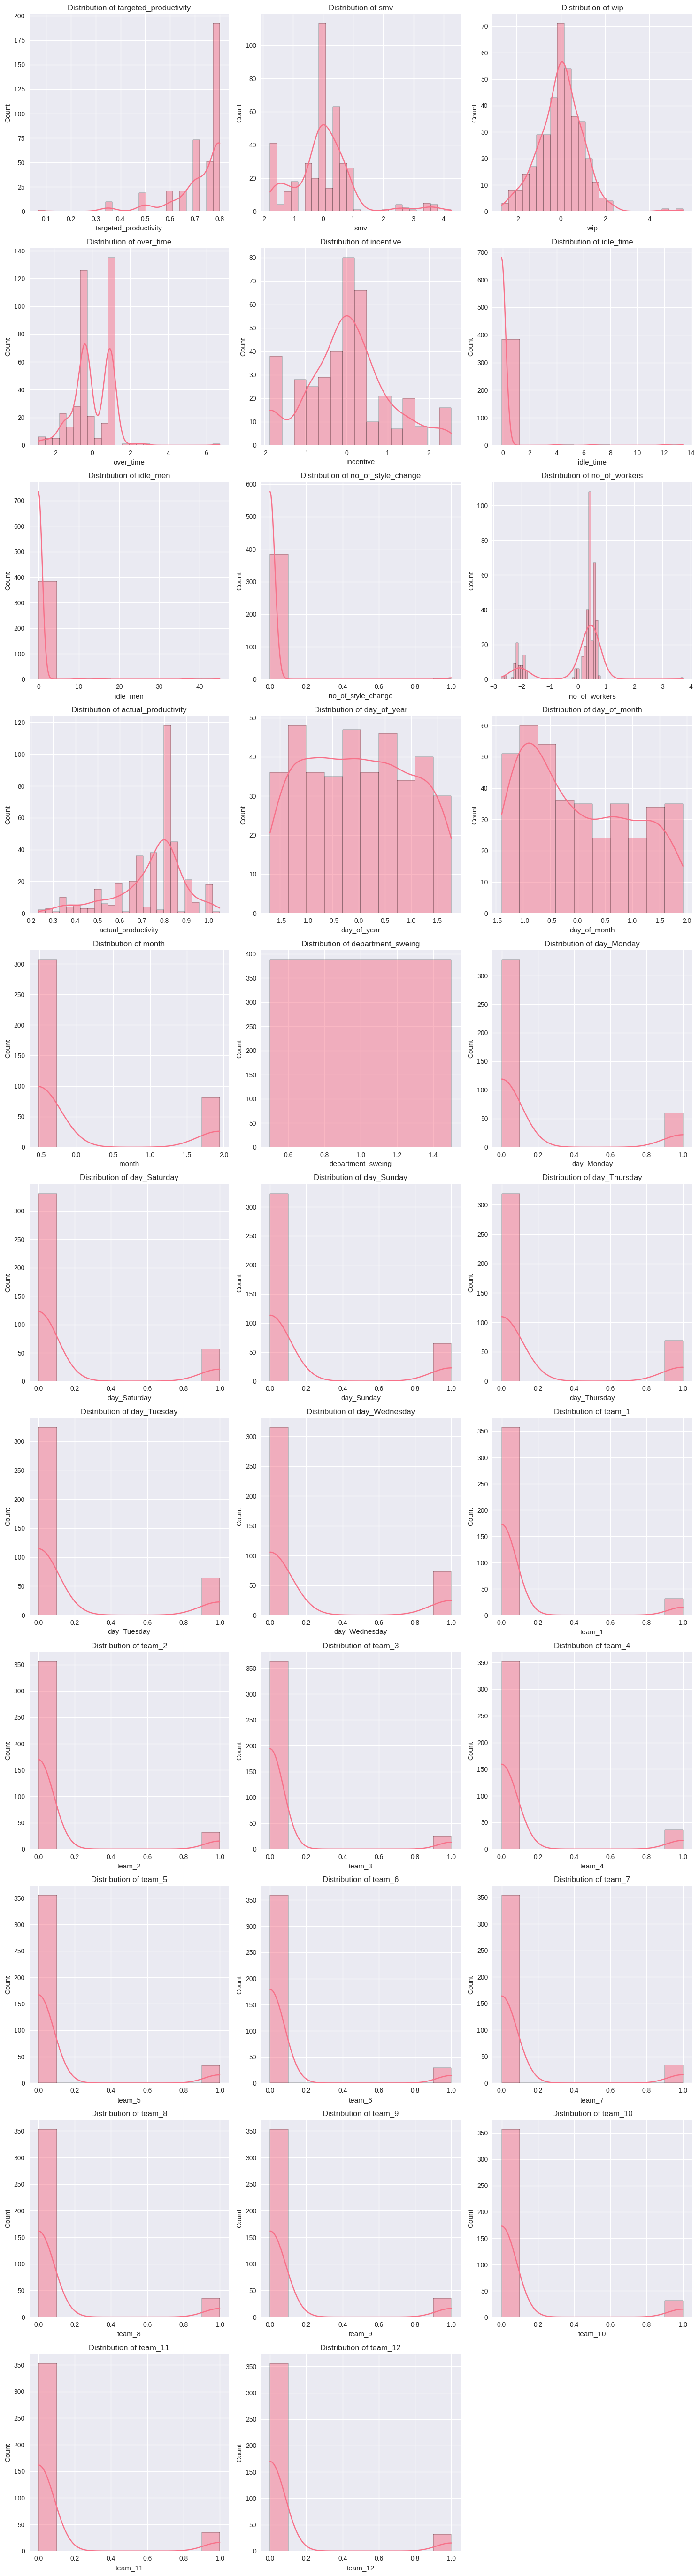

In [196]:
plot_all_columns(X)

### Solución 1: Clasificación Básica (Sin Técnicas Avanzadas)

In [197]:
# Eliminar filas con productividad > 1 (errores)
X = X.drop(X[X.actual_productivity > 1].index)

In [198]:
# Drop duplicate columns
X.drop_duplicates(inplace=True)

In [199]:
# Discretizar la variable objetivo
# Clasificación binaria: Baja (<0.6), Alta (>=0.6)
y_bin = pd.cut(X['actual_productivity'], bins=[0, 0.6, 1], labels=['Baja', 'Alta'])

In [200]:
# Clasificación multiclase: Baja (<0.6), Media (0.6-0.9), Alta (>=0.9)
y_multi = pd.cut(X['actual_productivity'], bins=[0, 0.6, 0.9, 1], labels=['Baja', 'Media', 'Alta'])

### Procesamiento Manual de Variables

In [201]:
# Definir columnas numéricas y categóricas
numeric_features = ['targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time']
categorical_features = ['department', 'day', 'quarter', 'team']

# Imputar valores faltantes en 'wip'
#X['wip'] = X['wip'].fillna(X['wip'].median())

# Se escala variables numéricas
scaler = StandardScaler()

# Se codifica variables categóricas
#encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#X_cat = encoder.fit_transform(X[categorical_features])

# Combinar variables numéricas y categóricas
X[numeric_features] = scaler.fit_transform(X[numeric_features])


In [202]:
X.drop(columns=['actual_productivity'], inplace=True)

### Entrenar Modelos (Ejemplo para Clasificación Binaria)

In [203]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.3, random_state=42)

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
print("Precisión (Binaria):", accuracy_score(y_test, y_pred))

Precisión (Binaria): 0.8928571428571429


Accuracy: 0.8839285714285714


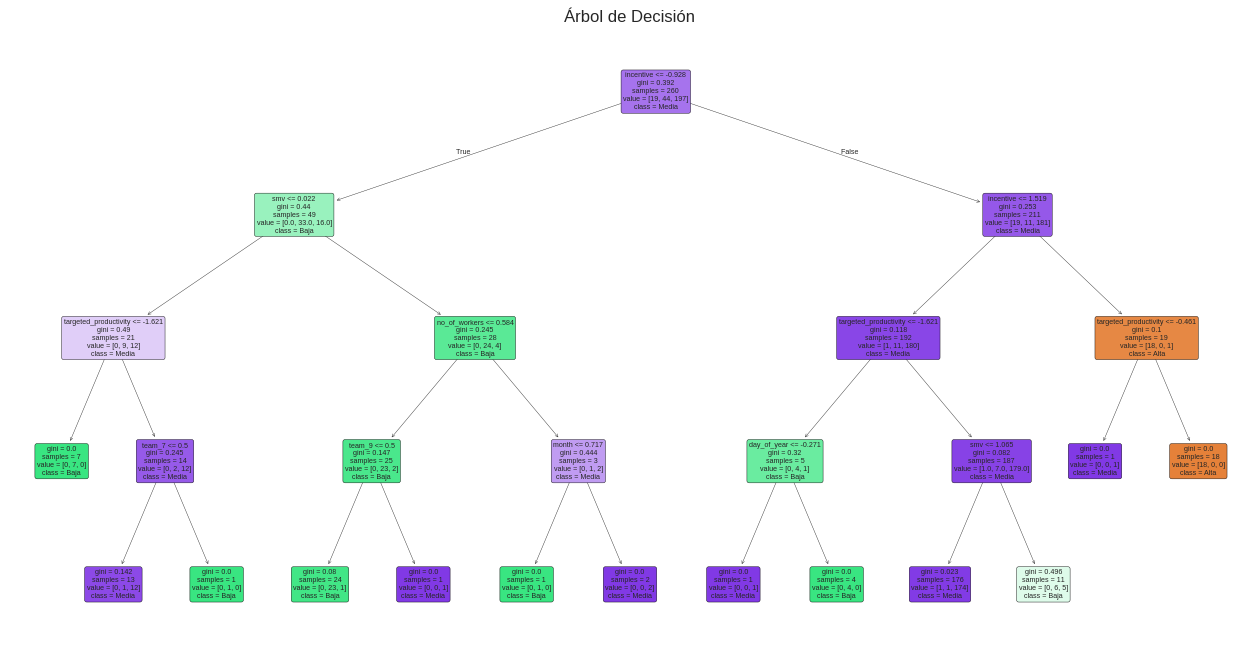

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Crear y entrenar el modelo Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Predecir y evaluar
y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=X_train.columns, class_names=[str(c) for c in tree.classes_], filled=True, rounded=True)
plt.title("Árbol de Decisión")
plt.show()


In [205]:
print(np.isnan(X).sum())  # Cuenta cuántos NaN hay

targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
day_of_year              0
day_of_month             0
month                    0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
team_1                   0
team_2                   0
team_3                   0
team_4                   0
team_5                   0
team_6                   0
team_7                   0
team_8                   0
team_9                   0
team_10                  0
team_11                  0
team_12                  0
dtype: int64


## Solucion 2 KNN

In [206]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8125


### SVM

In [207]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#for i in range(1, 11):
#    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
#        svm = SVC(kernel=kernel, C=i, random_state=42)
#        svm.fit(X_train, y_train)
#        y_pred = svm.predict(X_test)
#        print(f"Accuracy with kernel={kernel}: {accuracy_score(y_test, y_pred)}")


## Regresion logistica

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predecir y evaluar
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8571428571428571


## Solución 2: Clasificación Avanzada (Con Balanceo y Optimización)

### Balanceo de Clases (SMOTE)

In [209]:
from imblearn.over_sampling import SMOTE

# Dividir datos originales (sin balancear)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_multi, test_size=0.3, random_state=42, stratify=y_multi
)

# Aplicar SMOTE solo en entrenamiento (ejemplo para clasificación multiclase)
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_train, y_train)

### Optimizar Hiperparámetros (GridSearchCV)

In [210]:
"""
from sklearn.model_selection import GridSearchCV

# Definir parámetros para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Búsqueda en grid
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5
)
grid_search.fit(X_bal, y_bal)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir espacio de búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',  # Métrica para multiclase
    cv=5,
    n_jobs=-1
)

# Ejecutar búsqueda en datos balanceados
grid_search.fit(X_bal, y_bal)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'class_weight': None, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


### Evaluación en Conjunto de Prueba No Balanceado

In [211]:
from sklearn.metrics import classification_report, confusion_matrix

# Predecir en datos de prueba originales (no balanceados)
y_pred = best_model.predict(X_test)

# Métricas detalladas
print("Reporte de Clasificación (Datos Reales):\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

Reporte de Clasificación (Datos Reales):
               precision    recall  f1-score   support

        Alta       1.00      1.00      1.00         9
        Baja       0.79      0.83      0.81        18
       Media       0.96      0.95      0.96        85

    accuracy                           0.94       112
   macro avg       0.92      0.93      0.92       112
weighted avg       0.94      0.94      0.94       112

Matriz de Confusión:
 [[ 9  0  0]
 [ 0 15  3]
 [ 0  4 81]]


### Validación Cruzada y Evaluación

In [212]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
scores = cross_val_score(best_model, X_bal, y_bal, cv=5, scoring='f1_weighted')
print("F1-score promedio:", np.mean(scores))


# Evaluar en datos de prueba
#X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)
#y_pred = best_model.predict(X_test)
#print("Precisión (Multiclase):", accuracy_score(y_test, y_pred))

F1-score promedio: 0.9761894990689175
